<a href="https://colab.research.google.com/github/HASAN9519/Coursera_Capstone/blob/master/japan_restaurant_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [63]:
link = 'https://drive.google.com/open?id=190JYIBB1vRgUDW9gFkHuO_ZSxD_BDrQD' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

190JYIBB1vRgUDW9gFkHuO_ZSxD_BDrQD


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')

In [65]:
df 

,Neighborhood,Latitude,Longitude
0,Agariyashiki,33.9779,132.0887
1,Akihabara,35.7023,139.7745
2,Aoyama,35.6695,139.7192
3,Asagaya,35.7100,139.6376
4,Daikanyama,35.6505,139.7042
5,"Ebisu, Shibuya",35.6461,139.7154
6,"Ebisuminami, Shibuya",35.6450,139.7084
7,Ebisunishi,35.6486,139.7058
8,Harajuku,35.6700,139.7090
9,Hatsudai,35.6783,139.6854


### Explore and cluster the neighborhoods in Tokyo

In [66]:
df.columns

Index(['Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [67]:
df['Latitude'].dtypes

dtype('float64')

In [68]:
df['Neighborhood'].dtypes

dtype('O')

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [70]:
CLIENT_ID = 'LJZSPH3VDTJDGAPB4NWEI4QSX3MKHANOETI1IHYHDVZK0LAI' # your Foursquare ID
CLIENT_SECRET = 'SQMAH4A24V5EDDDJ3JTDZKBR2GIVALGGFAPUP3XTPVLGOY2U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LJZSPH3VDTJDGAPB4NWEI4QSX3MKHANOETI1IHYHDVZK0LAI
CLIENT_SECRET:SQMAH4A24V5EDDDJ3JTDZKBR2GIVALGGFAPUP3XTPVLGOY2U


In [71]:
mydata = df.copy()
mydata

,Neighborhood,Latitude,Longitude
0,Agariyashiki,33.9779,132.0887
1,Akihabara,35.7023,139.7745
2,Aoyama,35.6695,139.7192
3,Asagaya,35.7100,139.6376
4,Daikanyama,35.6505,139.7042
5,"Ebisu, Shibuya",35.6461,139.7154
6,"Ebisuminami, Shibuya",35.6450,139.7084
7,Ebisunishi,35.6486,139.7058
8,Harajuku,35.6700,139.7090
9,Hatsudai,35.6783,139.6854


In [72]:
mydata.columns = list(map(str, mydata.columns))
print(type(mydata.columns))

<class 'pandas.core.indexes.base.Index'>


In [73]:
from geopy.geocoders import Nominatim
address = 'tokyo, japan'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of tokyo, japan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of tokyo, japan are 35.6828387, 139.7594549.


In [74]:
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(mydata['Latitude'], mydata['Longitude'], mydata['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo)  
    
map_tokyo

### Let's explore the first neighborhood in our dataframe

In [75]:
mydata.loc[0, 'Neighborhood']

'Agariyashiki'

In [76]:
neighborhood_latitude = mydata.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = mydata.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = mydata.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Agariyashiki are 33.9779, 132.0887.


### Now, let's get the top 100 venues that are in Agariyashiki within a radius of 500 meters

In [77]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=LJZSPH3VDTJDGAPB4NWEI4QSX3MKHANOETI1IHYHDVZK0LAI&client_secret=SQMAH4A24V5EDDDJ3JTDZKBR2GIVALGGFAPUP3XTPVLGOY2U&v=20180605&ll=33.9779,132.0887&radius=500&limit=100'

In [0]:
# Send the get requests
#From the Foursquare lab in the previous module, we know that all the information is in the items key. 
#Before we proceed, let's borrow the get_category_type function from the Foursquare lab.
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [79]:
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,新庄の長溝,River,33.978937,132.087593
1,HANAHANA,Japanese Restaurant,33.980976,132.089216
2,やまぐちフラワーランド,Park,33.981506,132.089181


### Explore Neighborhoods in Tokyo

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

### Now write the code to run the above function on each neighborhood and create a new dataframe called Tokyo_venues

In [81]:
Tokyo_venues = getNearbyVenues(names=mydata['Neighborhood'],
                                   latitudes=mydata['Latitude'],
                                   longitudes=mydata['Longitude']
                                  )

Agariyashiki
Akihabara
Aoyama
Asagaya
Daikanyama
Ebisu, Shibuya
Ebisuminami, Shibuya
Ebisunishi
Harajuku
Hatsudai
Hibiya
Higashi, Shibuya
Hiroo, Shibuya
Hitotsubashi, Chiyoda
Honjo, Tokyo
Honmachi, Shibuya
Ichigaya
Ikebukuro
Imado
Kabutocho
Kagurazaka
Kami-ikebukuro
Kanda, Tokyo
Marunouchi
Mejiro
Mita, Meguro, Tokyo
Miyamoto-cho, Tokyo
Nihonbashi
Nishi-Shinjuku
Nishihara, Shibuya
Nishiogikubo
Ochanomizu
Odaiba
Sasazuka
Sendagaya
Shiba, Minato, Tokyo
Shimokitazawa
Shin-Kiba
Shin-Koiwa
Shinjuku Golden Gai
Shinjuku Southern Terrace
Shiodome
Shitaya
Sugamo
Takadanobaba
Tamachi
Tateishi, Tokyo
Tomigaya
Toyosu
Uehara, Shibuya
Ura-Harajuku
Ushigome
Yanesen
Yotsuya
Yoyogi


In [82]:
print(Tokyo_venues.shape)
Tokyo_venues.head()

(3491, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agariyashiki,33.9779,132.0887,新庄の長溝,33.978937,132.087593,River
1,Agariyashiki,33.9779,132.0887,HANAHANA,33.980976,132.089216,Japanese Restaurant
2,Agariyashiki,33.9779,132.0887,やまぐちフラワーランド,33.981506,132.089181,Park
3,Akihabara,35.7023,139.7745,Akiba Fukurou (アキバフクロウ),35.700716,139.774753,Pet Café
4,Akihabara,35.7023,139.7745,MOGRA,35.701987,139.775072,Nightclub


In [83]:
Tokyo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agariyashiki,3,3,3,3,3,3
Akihabara,100,100,100,100,100,100
Aoyama,39,39,39,39,39,39
Asagaya,25,25,25,25,25,25
Daikanyama,100,100,100,100,100,100
"Ebisu, Shibuya",100,100,100,100,100,100
"Ebisuminami, Shibuya",100,100,100,100,100,100
Ebisunishi,100,100,100,100,100,100
Harajuku,100,100,100,100,100,100


In [84]:
print('There are {} uniques categories.'.format(len(Tokyo_venues['Venue Category'].unique())))

There are 295 uniques categories.


### Analyze Each Neighborhood

In [85]:
# one hot encoding
Tokyo_onehot = pd.get_dummies(Tokyo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + list(Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.tail(10)

,Neighborhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burmese Restaurant,Bus Station,Bus Stop,Business Center,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Confucian Temple,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Factory,Farmers Market,Fast Food Restaurant,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kaiseki Restaurant,Karaoke Bar,Karaoke Box,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nature Preserve,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Road,Rock Club,Rugby Stadium,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Temple,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Travel Agency,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video 

In [86]:
Tokyo_onehot.shape

(3491, 296)

In [87]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burmese Restaurant,Bus Station,Bus Stop,Business Center,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Confucian Temple,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donburi Restaurant,Dongbei Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Factory,Farmers Market,Fast Food Restaurant,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Hawaiian Restaurant,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kaiseki Restaurant,Karaoke Bar,Karaoke Box,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nabe Restaurant,Nature Preserve,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Restaurant,River,Road,Rock Club,Rugby Stadium,Russian Restaurant,Sake Bar,Salad Place,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shrine,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Place,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stables,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Sukiyaki Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Temple,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Tonkatsu Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Travel Agency,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Unagi Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video 

In [88]:
Tokyo_grouped.shape

(55, 296)

In [89]:
num_top_venues = 5

for hood in Tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Tokyo_grouped[Tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agariyashiki----
                 venue  freq
0  Japanese Restaurant  0.33
1                 Park  0.33
2                River  0.33
3             Pharmacy  0.00
4             Platform  0.00


----Akihabara----
               venue  freq
0   Ramen Restaurant  0.10
1               Café  0.09
2         Hobby Shop  0.08
3  Electronics Store  0.07
4           Sake Bar  0.04


----Aoyama----
                       venue  freq
0         Italian Restaurant  0.10
1           Sushi Restaurant  0.08
2          French Restaurant  0.08
3                  Rock Club  0.05
4  Japanese Curry Restaurant  0.05


----Asagaya----
                  venue  freq
0     Convenience Store  0.28
1      Ramen Restaurant  0.08
2   Japanese Restaurant  0.08
3        Ice Cream Shop  0.04
4  Fast Food Restaurant  0.04


----Daikanyama----
                 venue  freq
0                 Café  0.09
1  Japanese Restaurant  0.09
2   Italian Restaurant  0.07
3             Boutique  0.06
4               Bakery  0.05


-

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [91]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agariyashiki,Park,Japanese Restaurant,River,Yoshoku Restaurant,Forest,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand
1,Akihabara,Ramen Restaurant,Café,Hobby Shop,Electronics Store,Sake Bar,Chinese Restaurant,Japanese Restaurant,Kebab Restaurant,Bar,Burger Joint
2,Aoyama,Italian Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Coffee Shop,Ramen Restaurant,Rock Club,Japanese Restaurant,Furniture / Home Store,Pizza Place
3,Asagaya,Convenience Store,Japanese Restaurant,Ramen Restaurant,Shopping Mall,Chinese Restaurant,Pharmacy,Pet Store,Grocery Store,Café,BBQ Joint
4,Daikanyama,Japanese Restaurant,Café,Italian Restaurant,Boutique,Bakery,Coffee Shop,BBQ Joint,Rock Club,French Restaurant,Bar


### Cluster Neighborhoods

In [92]:
kclusters = 3

Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [93]:
# add clustering labels
neighborhoods_venues_sorted.insert(0,'Cluster Label',  kmeans.labels_)

Tokyo_merged = mydata

# merge tokyo_grouped with tokyo_data to add latitude/longitude for each neighborhood
Tokyo_merged = Tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Tokyo_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agariyashiki,33.9779,132.0887,0,Park,Japanese Restaurant,River,Yoshoku Restaurant,Forest,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand
1,Akihabara,35.7023,139.7745,0,Ramen Restaurant,Café,Hobby Shop,Electronics Store,Sake Bar,Chinese Restaurant,Japanese Restaurant,Kebab Restaurant,Bar,Burger Joint
2,Aoyama,35.6695,139.7192,0,Italian Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Coffee Shop,Ramen Restaurant,Rock Club,Japanese Restaurant,Furniture / Home Store,Pizza Place
3,Asagaya,35.7100,139.6376,1,Convenience Store,Japanese Restaurant,Ramen Restaurant,Shopping Mall,Chinese Restaurant,Pharmacy,Pet Store,Grocery Store,Café,BBQ Joint
4,Daikanyama,35.6505,139.7042,0,Japanese Restaurant,Café,Italian Restaurant,Boutique,Bakery,Coffee Shop,BBQ Joint,Rock Club,French Restaurant,Bar


In [94]:
Tokyo_merged

,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agariyashiki,33.9779,132.0887,0,Park,Japanese Restaurant,River,Yoshoku Restaurant,Forest,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand
1,Akihabara,35.7023,139.7745,0,Ramen Restaurant,Café,Hobby Shop,Electronics Store,Sake Bar,Chinese Restaurant,Japanese Restaurant,Kebab Restaurant,Bar,Burger Joint
2,Aoyama,35.6695,139.7192,0,Italian Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Coffee Shop,Ramen Restaurant,Rock Club,Japanese Restaurant,Furniture / Home Store,Pizza Place
3,Asagaya,35.7100,139.6376,1,Convenience Store,Japanese Restaurant,Ramen Restaurant,Shopping Mall,Chinese Restaurant,Pharmacy,Pet Store,Grocery Store,Café,BBQ Joint
4,Daikanyama,35.6505,139.7042,0,Japanese Restaurant,Café,Italian Restaurant,Boutique,Bakery,Coffee Shop,BBQ Joint,Rock Club,French Restaurant,Bar
5,"Ebisu, Shibuya",35.6461,139.7154,0,Italian Restaurant,Japanese Restaurant,Ramen Restaurant,Sake Bar,Soba Restaurant,BBQ Joint,Coffee Shop,Pizza Place,Bar,Chinese Restaurant
6,"Ebisuminami, Shibuya",35.6450,139.7084,0,BBQ Joint,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Bar,Coffee Shop,Café,Chinese Restaurant,Korean Restaurant,Thai Restaurant
7,Ebisunishi,35.6486,139.7058,0,Japanese Restaurant,Boutique,BBQ Joint,Café,Coffee Shop,Italian Restaurant,Bar,Bakery,Rock Club,Seafood Restaurant
8,Harajuku,35.6700,139.7090,0,Café,Coffee Shop,Chinese Restaurant,Toy / Game Store,Italian Restaurant,Japanese Restaurant,French Restaurant,Soba Restaurant,Thai Restaurant,Shoe Store
9,Hatsudai,35.6783,139.6854,0,Convenience Store,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Theater,Café,Sake Bar,Indian Restaurant,Fast Food Restaurant,Dumpling Restaurant


In [0]:
Tokyo_merged=Tokyo_merged.dropna()
Tokyo_merged['Cluster Label']=Tokyo_merged['Cluster Label'].astype(int)

In [96]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_merged['Latitude'], Tokyo_merged['Longitude'], Tokyo_merged['Neighborhood'], Tokyo_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [97]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in Tokyo_merged.columns)

True

In [98]:
t0 = Tokyo_merged.loc[Tokyo_merged['Cluster Label'] == 0, Tokyo_merged.columns[[0] + list(range(3, Tokyo_merged.shape[1]))]]
t0

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agariyashiki,0,Park,Japanese Restaurant,River,Yoshoku Restaurant,Forest,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand
1,Akihabara,0,Ramen Restaurant,Café,Hobby Shop,Electronics Store,Sake Bar,Chinese Restaurant,Japanese Restaurant,Kebab Restaurant,Bar,Burger Joint
2,Aoyama,0,Italian Restaurant,French Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Coffee Shop,Ramen Restaurant,Rock Club,Japanese Restaurant,Furniture / Home Store,Pizza Place
4,Daikanyama,0,Japanese Restaurant,Café,Italian Restaurant,Boutique,Bakery,Coffee Shop,BBQ Joint,Rock Club,French Restaurant,Bar
5,"Ebisu, Shibuya",0,Italian Restaurant,Japanese Restaurant,Ramen Restaurant,Sake Bar,Soba Restaurant,BBQ Joint,Coffee Shop,Pizza Place,Bar,Chinese Restaurant
6,"Ebisuminami, Shibuya",0,BBQ Joint,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Bar,Coffee Shop,Café,Chinese Restaurant,Korean Restaurant,Thai Restaurant
7,Ebisunishi,0,Japanese Restaurant,Boutique,BBQ Joint,Café,Coffee Shop,Italian Restaurant,Bar,Bakery,Rock Club,Seafood Restaurant
8,Harajuku,0,Café,Coffee Shop,Chinese Restaurant,Toy / Game Store,Italian Restaurant,Japanese Restaurant,French Restaurant,Soba Restaurant,Thai Restaurant,Shoe Store
9,Hatsudai,0,Convenience Store,Ramen Restaurant,Chinese Restaurant,Coffee Shop,Theater,Café,Sake Bar,Indian Restaurant,Fast Food Restaurant,Dumpling Restaurant
10,Hibiya,0,Café,Theater,Italian Restaurant,Sushi Restaurant,Ramen Restaurant,Hotel,Japanese Restaurant,French Restaurant,Steakhouse,Garden


In [99]:
t1 = Tokyo_merged.loc[Tokyo_merged['Cluster Label'] == 1, Tokyo_merged.columns[[0] + list(range(3, Tokyo_merged.shape[1]))]]
t1

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Asagaya,1,Convenience Store,Japanese Restaurant,Ramen Restaurant,Shopping Mall,Chinese Restaurant,Pharmacy,Pet Store,Grocery Store,Café,BBQ Joint
18,Imado,1,Convenience Store,Ramen Restaurant,Wagashi Place,Intersection,Jewelry Store,Baseball Field,Food & Drink Shop,Candy Store,Performing Arts Venue,Park
21,Kami-ikebukuro,1,Convenience Store,Park,Intersection,Drugstore,Music Venue,Kebab Restaurant,Persian Restaurant,Factory,Bus Stop,Pizza Place
22,"Kanda, Tokyo",1,Ramen Restaurant,Convenience Store,Chinese Restaurant,Gourmet Shop,Pharmacy,Shipping Store,Supermarket,Fried Chicken Joint,French Restaurant,Fountain
26,"Miyamoto-cho, Tokyo",1,Convenience Store,Chinese Restaurant,Drugstore,Bath House,Forest,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Stand
33,Sasazuka,1,Convenience Store,Ramen Restaurant,Italian Restaurant,Shopping Mall,Japanese Restaurant,Coffee Shop,Café,Grocery Store,Fast Food Restaurant,Donburi Restaurant
37,Shin-Kiba,1,Park,Intersection,Nightclub,Rock Club,Convenience Store,Shipping Store,Bus Station,Flower Shop,Food & Drink Shop,Food Court
38,Shin-Koiwa,1,Convenience Store,Sake Bar,Ramen Restaurant,Sushi Restaurant,Italian Restaurant,Arcade,Supermarket,Grocery Store,Gym / Fitness Center,Shopping Mall
42,Shitaya,1,Convenience Store,Sake Bar,Grocery Store,Hostel,Ramen Restaurant,Hotel,Chinese Restaurant,Coffee Shop,Donburi Restaurant,Intersection


In [100]:
t2 = Tokyo_merged.loc[Tokyo_merged['Cluster Label'] == 2, Tokyo_merged.columns[[0] + list(range(3, Tokyo_merged.shape[1]))]]
t2

,Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Ushigome,2,Beach,Japanese Restaurant,Yoshoku Restaurant,Fountain,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest


In [101]:
t0.dtypes

Neighborhood              object
Cluster Label              int64
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

In [102]:
t0[['1st Most Common Venue']].values

array([['Park'],
       ['Ramen Restaurant'],
       ['Italian Restaurant'],
       ['Japanese Restaurant'],
       ['Italian Restaurant'],
       ['BBQ Joint'],
       ['Japanese Restaurant'],
       ['Café'],
       ['Convenience Store'],
       ['Café'],
       ['Hotpot Restaurant'],
       ['Café'],
       ['Convenience Store'],
       ['Ramen Restaurant'],
       ['Clothing Store'],
       ['Chinese Restaurant'],
       ['Sake Bar'],
       ['Ramen Restaurant'],
       ['Italian Restaurant'],
       ['Café'],
       ['Café'],
       ['Japanese Restaurant'],
       ['Ramen Restaurant'],
       ['Ramen Restaurant'],
       ['Café'],
       ['Café'],
       ['Café'],
       ['Convenience Store'],
       ['Café'],
       ['Japanese Restaurant'],
       ['Japanese Curry Restaurant'],
       ['Sake Bar'],
       ['Japanese Restaurant'],
       ['Japanese Restaurant'],
       ['Japanese Restaurant'],
       ['Ramen Restaurant'],
       ['Japanese Restaurant'],
       ['Sake Bar'],
      

In [103]:
t1['1st Most Common Venue'].count()

9

In [104]:
t1['1st Most Common Venue'].unique()

array(['Convenience Store', 'Ramen Restaurant', 'Park'], dtype=object)

### let's analyze our Cluster

In [105]:
tx01= pd.Series(t0['1st Most Common Venue']).value_counts().to_frame()
tx01.index.name = 'Frequency'
tx01=tx01.reset_index()
tx01.rename(columns={'Frequency':'1st Most Common Venue',
                          '1st Most Common Venue':'Frequency'},inplace=True)
tx01

,1st Most Common Venue,Frequency
0,Café,11
1,Japanese Restaurant,8
2,Ramen Restaurant,6
3,Convenience Store,5
4,Sake Bar,4
5,Italian Restaurant,3
6,Coffee Shop,2
7,Park,1
8,BBQ Joint,1
9,Hotpot Restaurant,1


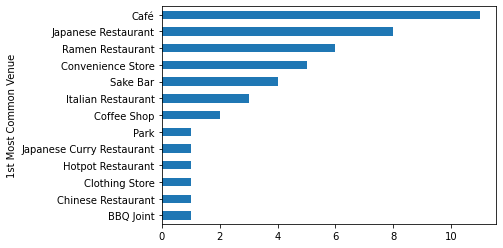

In [106]:
x1 = tx01.groupby('1st Most Common Venue')['Frequency'].mean().sort_values()
x1.plot(kind='barh')

In [107]:
tx11= pd.Series(t1['1st Most Common Venue']).value_counts().to_frame()
tx11.index.name = 'Frequency'
tx11=tx11.reset_index()
tx11.rename(columns={'Frequency':'1st Most Common Venue',
                          '1st Most Common Venue':'Frequency'},inplace=True)
tx11

,1st Most Common Venue,Frequency
0,Convenience Store,7
1,Park,1
2,Ramen Restaurant,1


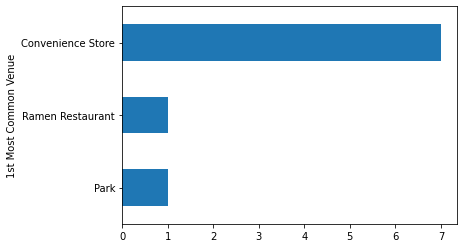

In [108]:
x2 = tx11.groupby('1st Most Common Venue')['Frequency'].mean().sort_values()
x2.plot(kind='barh')

In [109]:
tx02= pd.Series(t0['2nd Most Common Venue']).value_counts().to_frame()
tx02.index.name = 'Frequency'
tx02=tx02.reset_index()
tx02.rename(columns={'Frequency':'2nd Most Common Venue',
                          '2nd Most Common Venue':'Frequency'},inplace=True)
tx02

,2nd Most Common Venue,Frequency
0,Japanese Restaurant,9
1,Café,6
2,Convenience Store,6
3,Italian Restaurant,3
4,Chinese Restaurant,3
5,Hotel,2
6,Coffee Shop,2
7,Ramen Restaurant,2
8,Theater,1
9,Sake Bar,1


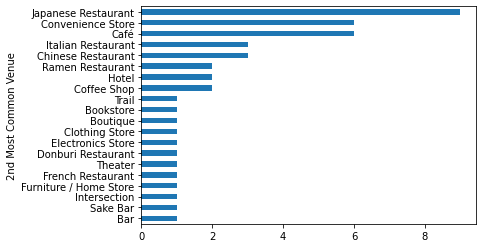

In [110]:
x3 = tx02.groupby('2nd Most Common Venue')['Frequency'].mean().sort_values()
x3.plot(kind='barh')

In [111]:
tx12= pd.Series(t1['2nd Most Common Venue']).value_counts().to_frame()
tx12.index.name = 'Frequency'
tx12=tx12.reset_index()
tx12.rename(columns={'Frequency':'2nd Most Common Venue',
                          '2nd Most Common Venue':'Frequency'},inplace=True)
tx12

,2nd Most Common Venue,Frequency
0,Sake Bar,2
1,Ramen Restaurant,2
2,Park,1
3,Convenience Store,1
4,Intersection,1
5,Chinese Restaurant,1
6,Japanese Restaurant,1


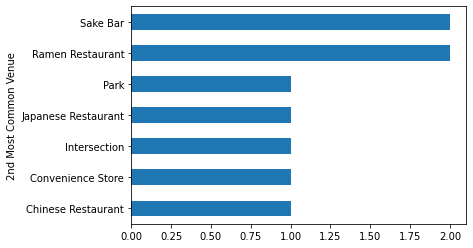

In [112]:
x4= tx12.groupby('2nd Most Common Venue')['Frequency'].mean().sort_values()
x4.plot(kind='barh')

In [113]:
tx03= pd.Series(t0['3rd Most Common Venue']).value_counts().to_frame()
tx03.index.name = 'Frequency'
tx03=tx03.reset_index()
tx03.rename(columns={'Frequency':'3rd Most Common Venue',
                          '3rd Most Common Venue':'Frequency'},inplace=True)
tx03

,3rd Most Common Venue,Frequency
0,Coffee Shop,7
1,Ramen Restaurant,6
2,Japanese Restaurant,6
3,Chinese Restaurant,5
4,Italian Restaurant,5
5,Sake Bar,3
6,Convenience Store,3
7,Sushi Restaurant,1
8,River,1
9,Café,1


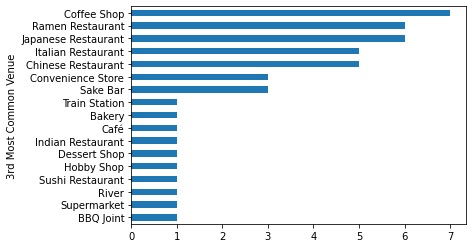

In [114]:
x5 = tx03.groupby('3rd Most Common Venue')['Frequency'].mean().sort_values()
x5.plot(kind='barh')

In [115]:
tx13= pd.Series(t1['3rd Most Common Venue']).value_counts().to_frame()
tx13.index.name = 'Frequency'
tx13=tx13.reset_index()
tx13.rename(columns={'Frequency':'3rd Most Common Venue',
                          '3rd Most Common Venue':'Frequency'},inplace=True)
tx13

,3rd Most Common Venue,Frequency
0,Ramen Restaurant,2
1,Nightclub,1
2,Italian Restaurant,1
3,Wagashi Place,1
4,Intersection,1
5,Grocery Store,1
6,Chinese Restaurant,1
7,Drugstore,1


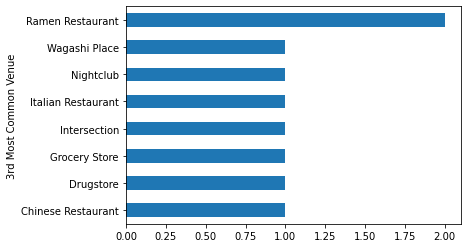

In [116]:
x6 = tx13.groupby('3rd Most Common Venue')['Frequency'].mean().sort_values()
x6.plot(kind='barh')

In [117]:
# Multi-column frequency count 
count = t0.groupby(['1st Most Common Venue', '2nd Most Common Venue']).size() 
print(count) 

1st Most Common Venue      2nd Most Common Venue 
BBQ Joint                  Italian Restaurant        1
Café                       Chinese Restaurant        1
                           Clothing Store            1
                           Coffee Shop               2
                           Convenience Store         2
                           Electronics Store         1
                           Hotel                     1
                           Intersection              1
                           Japanese Restaurant       1
                           Theater                   1
Chinese Restaurant         Sake Bar                  1
Clothing Store             Bookstore                 1
Coffee Shop                Café                      1
                           Furniture / Home Store    1
Convenience Store          Café                      2
                           Italian Restaurant        1
                           Japanese Restaurant       1
               

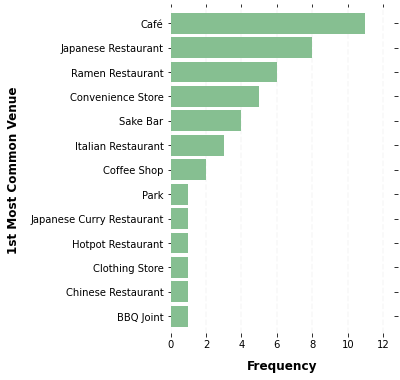

In [121]:
from matplotlib.ticker import StrMethodFormatter
ax = x1.plot(kind='barh', figsize=(4, 6), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Frequency", weight='bold',labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("1st Most Common Venue", weight='bold',labelpad=10, size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

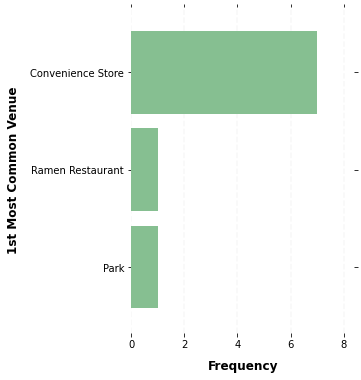

In [122]:
ax = x2.plot(kind='barh', figsize=(4, 6), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Frequency", weight='bold',labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("1st Most Common Venue", weight='bold',labelpad=10, size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

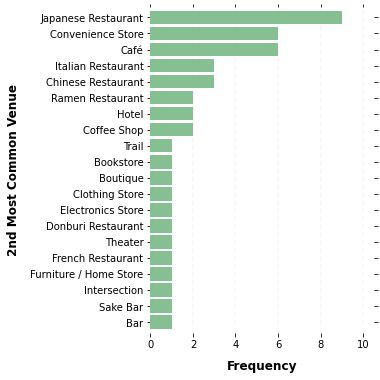

In [123]:
ax = x3.plot(kind='barh', figsize=(4, 6), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Frequency", weight='bold',labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("2nd Most Common Venue", weight='bold',labelpad=10, size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

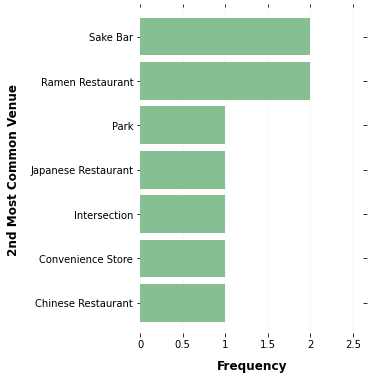

In [124]:
ax = x4.plot(kind='barh', figsize=(4, 6), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Frequency", weight='bold',labelpad=10, size=12)
# Set y-axis label
ax.set_ylabel("2nd Most Common Venue", weight='bold',labelpad=10, size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

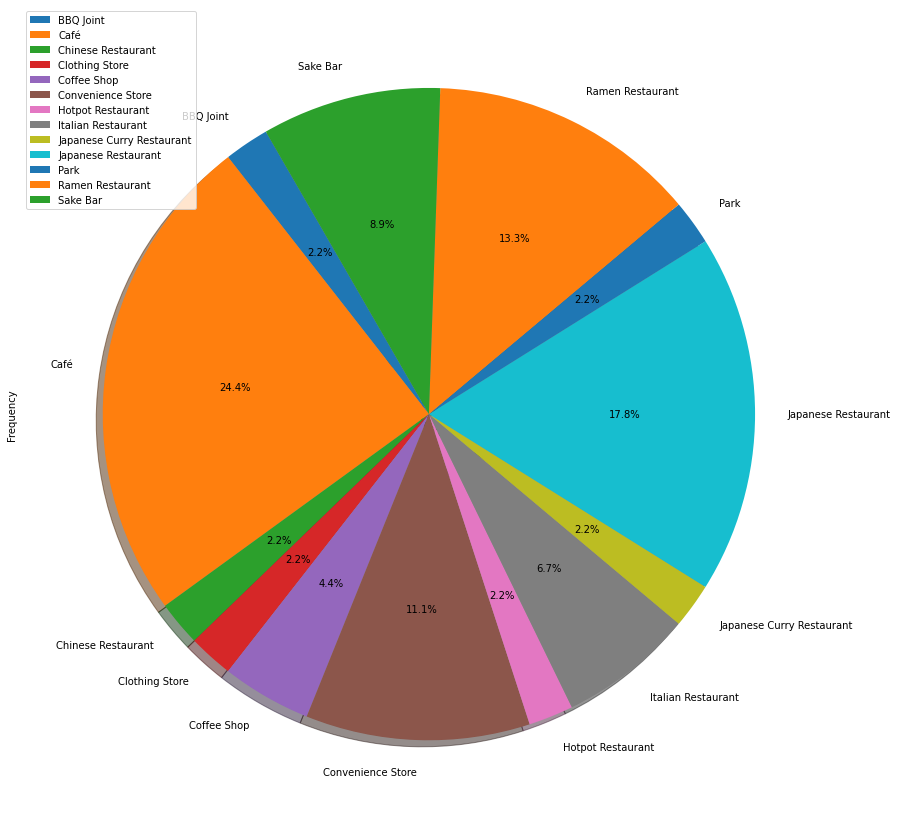

In [125]:
tx01.groupby(['1st Most Common Venue']).sum().plot(kind='pie', y='Frequency',shadow = True, startangle=120,figsize=(15,15),autopct='%1.1f%%')

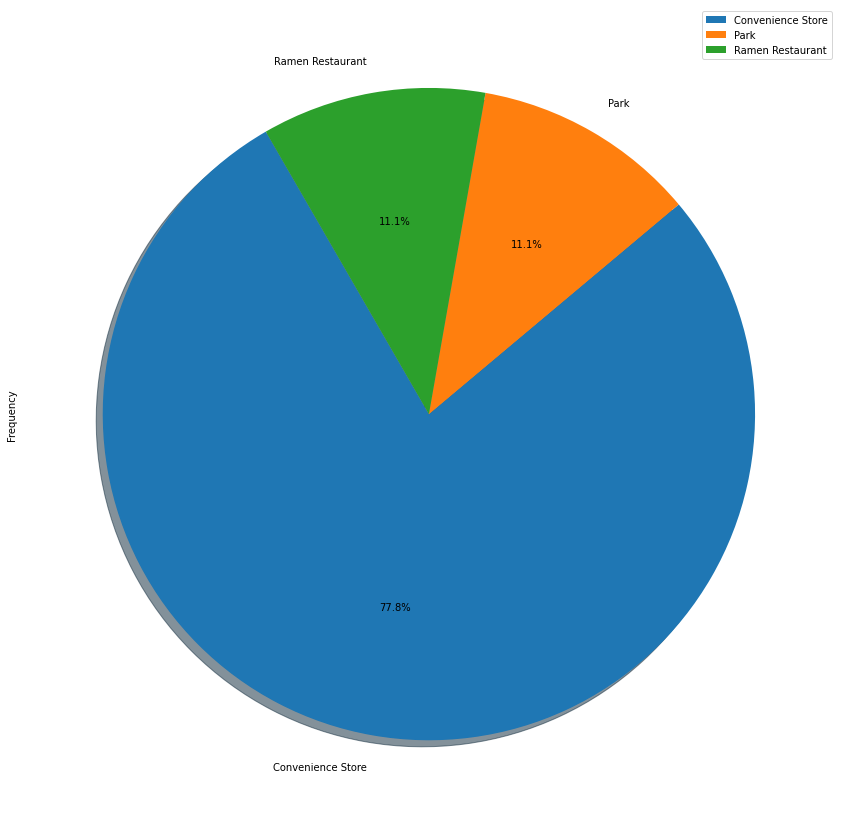

In [126]:
tx11.groupby(['1st Most Common Venue']).sum().plot(kind='pie', y='Frequency',shadow = True, startangle=120,figsize=(15,15),autopct='%1.1f%%')

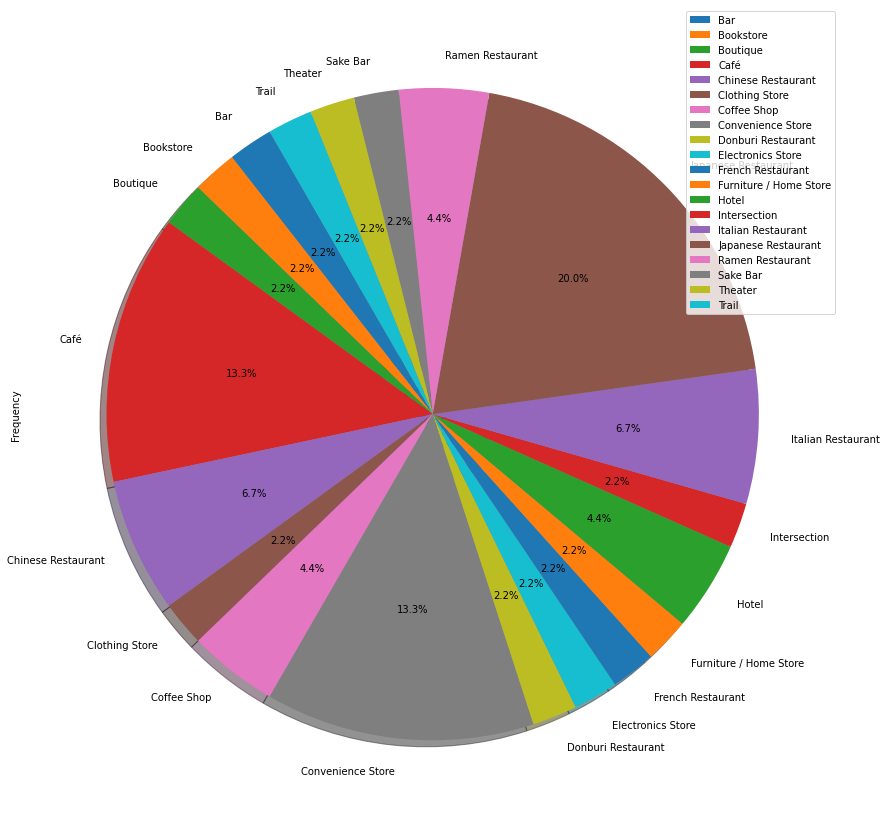

In [128]:
tx02.groupby(['2nd Most Common Venue']).sum().plot(kind='pie', y='Frequency',shadow = True, startangle=120,figsize=(15,15),autopct='%1.1f%%')

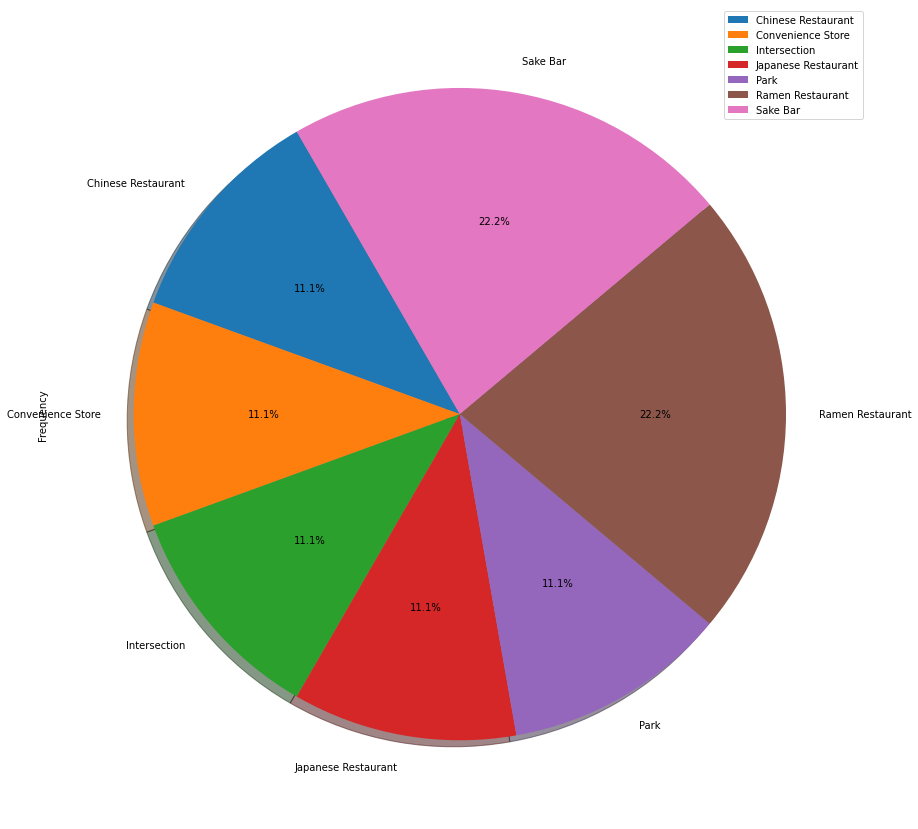

In [129]:
tx12.groupby(['2nd Most Common Venue']).sum().plot(kind='pie', y='Frequency',shadow = True, startangle=120,figsize=(15,15),autopct='%1.1f%%')